# Análisis de Dr. Scratch  

<p> Se ha de realizar un análisis previo y general sobre los datos obtenidos a partir de los distintos proyectos .sb3.</p> 
<p> Se indican a continuación cuáles son las puntuaciones que se consiguen en cada proyecto, para cada una de las 7 habilidades analizadas del pensamiento computacional.</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_analyzer = pd.read_csv("resultados.csv")
df_analyzer.head()

,Project,Total,Average,Level,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
0,12002214_2019_11_27_14_26_43_941914.sb3,0,0.000000,Basic,0,0,0,0,0,0,0
1,120039229_2019_12_24_06_12_25_867981.sb3,13,1.857143,Developing,1,2,3,1,1,2,3
2,1202324_2020_06_16_08_40_16_613045.sb3,14,2.000000,Developing,3,3,2,1,2,2,1
3,12027518_2021_01_13_13_37_57_574946.sb3,18,2.571429,Proficiency,3,3,3,1,3,2,3
4,120406791_2020_10_04_06_51_35_316448.sb3,5,0.714286,Basic,0,2,0,1,1,1,0


Para obtener información sobre el tipo de las columnas:

In [3]:
df_analyzer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Project             100 non-null    object 
 1   Total               100 non-null    int64  
 2   Average             100 non-null    float64
 3   Level               100 non-null    object 
 4   Abstraction         100 non-null    int64  
 5   Parallelization     100 non-null    int64  
 6   Logic               100 non-null    int64  
 7   Synchronization     100 non-null    int64  
 8   Flow Control        100 non-null    int64  
 9   UserInteractivity   100 non-null    int64  
 10  DataRepresentation  100 non-null    int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 8.7+ KB


Si queremos que la columna Level sea una variable categórica:

In [8]:
df_analyzer["Level"] = pd.Categorical(df_analyzer["Level"])
df_analyzer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Project             100 non-null    object  
 1   Total               100 non-null    int64   
 2   Average             100 non-null    float64 
 3   Level               100 non-null    category
 4   Abstraction         100 non-null    int64   
 5   Parallelization     100 non-null    int64   
 6   Logic               100 non-null    int64   
 7   Synchronization     100 non-null    int64   
 8   Flow Control        100 non-null    int64   
 9   UserInteractivity   100 non-null    int64   
 10  DataRepresentation  100 non-null    int64   
dtypes: category(1), float64(1), int64(8), object(1)
memory usage: 8.2+ KB


In [ ]:
#pd.set_option("display.precision", 2)
pd.set_option('display.float_format', '{:.2f}'.format)

In [9]:
df_analyzer.shape

(100, 11)

In [10]:
df_analyzer.index

RangeIndex(start=0, stop=100, step=1)

In [12]:
df_analyzer.axes[0] # Índice de filas

RangeIndex(start=0, stop=100, step=1)

In [11]:
df_analyzer.columns #También se puede df_analyzer.keys()

Index(['Project', 'Total', 'Average', 'Level', 'Abstraction',
       'Parallelization', 'Logic', 'Synchronization', 'Flow Control',
       'UserInteractivity', 'DataRepresentation'],
      dtype='object')

In [13]:
df_analyzer.axes[1] # Índice de columnas

Index(['Project', 'Total', 'Average', 'Level', 'Abstraction',
       'Parallelization', 'Logic', 'Synchronization', 'Flow Control',
       'UserInteractivity', 'DataRepresentation'],
      dtype='object')

Estadística descriptiva básica para las variables numéricas.

In [14]:
df_analyzer.describe()

,Total,Average,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,10.520000,1.502857,1.300000,1.750000,1.630000,1.230000,1.470000,1.570000,1.570000
std,6.079407,0.868487,1.218544,0.957427,1.260551,1.081105,0.834302,0.781801,1.273308
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,0.714286,0.000000,1.750000,0.000000,0.000000,1.000000,1.750000,0.000000
50%,13.000000,1.857143,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000
75%,15.000000,2.142857,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000
max,19.000000,2.714286,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000


En un 75% de las ocasiones los proyectos no superan los 15 puntos totales en cuanto a pensamiento computacional.

In [15]:
df_analyzer.describe(include=object)

,Project
count,100
unique,100
top,121595381_2021_02_01_12_18_25_550087.sb3
freq,1


<p> Los proyectos ordenados de mayor a menor puntuación total, y por lo tanto de mayor a menor puntuación media, son: </p>

In [16]:
df_analyzer.sort_values(by='Total', ascending = False)

,Project,Total,Average,Level,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
45,123259467_2019_12_24_06_14_24_921337.sb3,19,2.714286,Proficiency,3,3,3,2,3,2,3
43,123142330_2020_03_02_14_38_01_469193.sb3,18,2.571429,Proficiency,3,3,2,3,2,2,3
3,12027518_2021_01_13_13_37_57_574946.sb3,18,2.571429,Proficiency,3,3,3,1,3,2,3
37,12239450_2020_11_17_16_59_31_702345.sb3,17,2.428571,Proficiency,3,2,3,2,2,2,3
35,1223_2020_02_03_15_09_27_783332.sb3,17,2.428571,Proficiency,3,2,3,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...
46,123259467_2020_03_29_22_08_17_838940.sb3,0,0.000000,Basic,0,0,0,0,0,0,0
48,123355627_2019_11_19_14_22_42_147655.sb3,0,0.000000,Basic,0,0,0,0,0,0,0
49,123355627_2019_11_19_14_22_52_525660.sb3,0,0.000000,Basic,0,0,0,0,0,0,0
74,1234567890_2020_02_26_08_37_16_715808.sb3,0,0.000000,Basic,0,0,0,0,0,0,0


El nº de proyectos con puntuación baja (Level: Basic), media (Level= Developing) y alta (Level: Profeciency) son:

In [45]:
df_analyzer["Level"].value_counts(ascending=False)

Proficiency    43
Basic          30
Developing     27
Name: Level, dtype: int64

In [46]:
df_analyzer["Level"].value_counts(normalize=True)

Proficiency    0.43
Basic          0.30
Developing     0.27
Name: Level, dtype: float64

In [43]:
df_analyzer["Level"].unique()

['Basic', 'Developing', 'Proficiency']
Categories (3, object): ['Basic', 'Developing', 'Proficiency']

Una forma de filtrar por nivel para lugo poder visualizar:

In [22]:
filt = df_analyzer['Level'].str.contains('Basic', na=False)
filt

0      True
1     False
2     False
3     False
4      True
      ...  
95     True
96     True
97     True
98     True
99     True
Name: Level, Length: 100, dtype: bool

In [23]:
df_analyzer.loc[filt]

,Project,Total,Average,Level,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
0,12002214_2019_11_27_14_26_43_941914.sb3,0,0.000000,Basic,0,0,0,0,0,0,0
4,120406791_2020_10_04_06_51_35_316448.sb3,5,0.714286,Basic,0,2,0,1,1,1,0
7,120534515_2020_03_29_21_45_24_871377.sb3,0,0.000000,Basic,0,0,0,0,0,0,0
12,12115110_2020_01_08_20_14_14_558772.sb3,0,0.000000,Basic,0,0,0,0,0,0,0
13,12115110_2020_01_08_20_14_28_244141.sb3,0,0.000000,Basic,0,0,0,0,0,0,0
15,121180931_2020_10_28_18_25_00_679248.sb3,0,0.000000,Basic,0,0,0,0,0,0,0
20,121595381_2021_02_01_12_18_25_550087.sb3,7,1.000000,Basic,0,2,0,1,1,2,1
23,121712839_2020_01_17_11_37_54_207556.sb3,0,0.000000,Basic,0,0,0,0,0,0,0
24,121712839_2020_01_17_11_38_07_079322.sb3,0,0.000000,Basic,0,0,0,0,0,0,0
25,121712839_2020_01_17_11_38_33_619453.sb3,0,0.000000,Basic,0,0,0,0,0,0,0


Para seleccionar las 7 habilidades del pensamiento computacional (CT):

In [78]:
df_analyzer.iloc[-10:,4:]

,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
90,0,2,0,0,1,1,0
91,0,2,0,0,1,1,0
92,0,2,0,0,1,1,0
93,0,2,0,1,1,1,0
94,0,1,0,0,2,2,0
95,0,1,0,0,2,2,0
96,0,1,0,0,2,2,0
97,0,1,0,1,2,2,0
98,0,1,0,0,2,2,0
99,0,1,0,0,2,2,0


También se puede hacer:

In [26]:
df_analyzer.loc[0:3, "Abstraction":"DataRepresentation"]

,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
0,0,0,0,0,0,0,0
1,1,2,3,1,1,2,3
2,3,3,2,1,2,2,1
3,3,3,3,1,3,2,3


De este modo, solo seleccionamos algunas de las columnas.

In [27]:
df_analyzer.loc[:10, ["Abstraction","DataRepresentation"]]

,Abstraction,DataRepresentation
0,0,0
1,1,3
2,3,1
3,3,3
4,0,0
5,1,3
6,1,3
7,0,0
8,3,2
9,3,3


Para visualizar los proyectos que cuentan con una paralelización = 3

In [28]:
df = df_analyzer.groupby(["Parallelization"])
df.get_group(3)

,Project,Total,Average,Level,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
2,1202324_2020_06_16_08_40_16_613045.sb3,14,2.000000,Developing,3,3,2,1,2,2,1
3,12027518_2021_01_13_13_37_57_574946.sb3,18,2.571429,Proficiency,3,3,3,1,3,2,3
8,1208699_2020_05_19_01_18_19_238119.sb3,17,2.428571,Proficiency,3,3,3,1,3,2,2
21,121658969_2021_05_25_17_42_00_468328.sb3,16,2.285714,Proficiency,3,3,2,1,2,2,3
22,121658969_2021_05_25_21_26_56_760288.sb3,16,2.285714,Proficiency,3,3,2,1,2,2,3
40,122770615_2020_02_13_08_46_31_801452.sb3,14,2.000000,Developing,2,3,3,1,2,2,1
41,122770615_2020_02_20_01_32_33_815862.sb3,14,2.000000,Developing,2,3,3,1,2,2,1
42,122770615_2020_02_20_15_11_56_406221.sb3,14,2.000000,Developing,2,3,3,1,2,2,1
43,123142330_2020_03_02_14_38_01_469193.sb3,18,2.571429,Proficiency,3,3,2,3,2,2,3
45,123259467_2019_12_24_06_14_24_921337.sb3,19,2.714286,Proficiency,3,3,3,2,3,2,3


In [126]:
~((df_analyzer["Logic"]>2)&(df_analyzer[["Parallelization"]]<=2))

,Parallelization,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
96,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
97,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
98,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [39]:
df_analyzer["Level"].describe()

count             100
unique              3
top       Proficiency
freq               43
Name: Level, dtype: object

In [80]:
groupby_count1 = df_analyzer.groupby(['Abstraction']).count()
groupby_count1

,Project,Total,Average,Level,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
Abstraction,,,,,,,,,,
0,35,35,35,35,35,35,35,35,35,35
1,28,28,28,28,28,28,28,28,28,28
2,9,9,9,9,9,9,9,9,9,9
3,28,28,28,28,28,28,28,28,28,28


In [83]:
df_analyzer["Abstraction"].value_counts(ascending=False)

0    35
1    28
3    28
2     9
Name: Abstraction, dtype: int64

array([[<AxesSubplot:title={'center':'Abstraction'}>]], dtype=object)

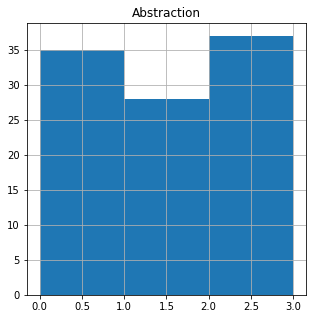

In [87]:
df_analyzer.hist(bins=3,column="Abstraction",figsize=(5,5))


In [54]:
df_analyzer.select_dtypes(include=np.number)

,Total,Average,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
0,0,0.000000,0,0,0,0,0,0,0
1,13,1.857143,1,2,3,1,1,2,3
2,14,2.000000,3,3,2,1,2,2,1
3,18,2.571429,3,3,3,1,3,2,3
4,5,0.714286,0,2,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...
95,5,0.714286,0,1,0,0,2,2,0
96,5,0.714286,0,1,0,0,2,2,0
97,6,0.857143,0,1,0,1,2,2,0
98,5,0.714286,0,1,0,0,2,2,0


In [72]:
df_analyzer[:-5]

,Total,Average,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
0,0,0.000000,0,0,0,0,0,0,0
1,13,1.857143,1,2,3,1,1,2,3
2,14,2.000000,3,3,2,1,2,2,1
3,18,2.571429,3,3,3,1,3,2,3
4,5,0.714286,0,2,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...
95,5,0.714286,0,1,0,0,2,2,0
96,5,0.714286,0,1,0,0,2,2,0
97,6,0.857143,0,1,0,1,2,2,0
98,5,0.714286,0,1,0,0,2,2,0


# Análisis estadístico

In [29]:
df_analyzer[:].mean()

Total                 10.520000
Average                1.502857
Abstraction            1.300000
Parallelization        1.750000
Logic                  1.630000
Synchronization        1.230000
Flow Control           1.470000
UserInteractivity      1.570000
DataRepresentation     1.570000
dtype: float64

In [30]:
#Tendencia central
df_analyzer.median()

Total                 13.000000
Average                1.857143
Abstraction            1.000000
Parallelization        2.000000
Logic                  2.000000
Synchronization        1.000000
Flow Control           2.000000
UserInteractivity      2.000000
DataRepresentation     2.000000
dtype: float64

In [31]:
# Percentil: Valor que no se supera en un 60% de los proyectos
df_analyzer.quantile(0.6)

Total                 15.000000
Average                2.142857
Abstraction            1.000000
Parallelization        2.000000
Logic                  2.000000
Synchronization        1.000000
Flow Control           2.000000
UserInteractivity      2.000000
DataRepresentation     2.000000
Name: 0.6, dtype: float64

In [32]:
df_analyzer.var()

Total                 36.959192
Average                0.754269
Abstraction            1.484848
Parallelization        0.916667
Logic                  1.588990
Synchronization        1.168788
Flow Control           0.696061
UserInteractivity      0.611212
DataRepresentation     1.621313
dtype: float64

In [33]:
df_analyzer.std()

Total                 6.079407
Average               0.868487
Abstraction           1.218544
Parallelization       0.957427
Logic                 1.260551
Synchronization       1.081105
Flow Control          0.834302
UserInteractivity     0.781801
DataRepresentation    1.273308
dtype: float64

In [34]:
df_analyzer.cov()

,Total,Average,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
Total,36.959192,5.279885,5.822222,5.090909,6.669091,4.636768,4.157172,4.084444,6.498586
Average,5.279885,0.754269,0.831746,0.727273,0.952727,0.662395,0.593882,0.583492,0.928369
Abstraction,5.822222,0.831746,1.484848,0.792929,1.071717,0.435354,0.615152,0.544444,0.877778
Parallelization,5.090909,0.727273,0.792929,0.916667,0.856061,0.553030,0.633838,0.618687,0.719697
Logic,6.669091,0.952727,1.071717,0.856061,1.588990,0.631414,0.620101,0.667576,1.233232
Synchronization,4.636768,0.662395,0.435354,0.553030,0.631414,1.168788,0.496869,0.453434,0.897879
Flow Control,4.157172,0.593882,0.615152,0.633838,0.620101,0.496869,0.696061,0.567778,0.527374
UserInteractivity,4.084444,0.583492,0.544444,0.618687,0.667576,0.453434,0.567778,0.611212,0.621313
DataRepresentation,6.498586,0.928369,0.877778,0.719697,1.233232,0.897879,0.527374,0.621313,1.621313


In [35]:
df_analyzer.corr()

,Total,Average,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
Total,1.000000,1.000000,0.785935,0.874638,0.870252,0.705483,0.819621,0.859361,0.839507
Average,1.000000,1.000000,0.785935,0.874638,0.870252,0.705483,0.819621,0.859361,0.839507
Abstraction,0.785935,0.785935,1.000000,0.679654,0.697716,0.330471,0.605087,0.571500,0.565731
Parallelization,0.874638,0.874638,0.679654,1.000000,0.709313,0.534288,0.793504,0.826550,0.590351
Logic,0.870252,0.870252,0.697716,0.709313,1.000000,0.463325,0.589628,0.677398,0.768335
Synchronization,0.705483,0.705483,0.330471,0.534288,0.463325,1.000000,0.550871,0.536476,0.652253
Flow Control,0.819621,0.819621,0.605087,0.793504,0.589628,0.550871,1.000000,0.870480,0.496434
UserInteractivity,0.859361,0.859361,0.571500,0.826550,0.677398,0.536476,0.870480,1.000000,0.624139
DataRepresentation,0.839507,0.839507,0.565731,0.590351,0.768335,0.652253,0.496434,0.624139,1.000000


In [36]:
# Correlación de cada CT con la puntuación total.
df_analyzer.corrwith(df_analyzer["Total"])

Total                 1.000000
Average               1.000000
Abstraction           0.785935
Parallelization       0.874638
Logic                 0.870252
Synchronization       0.705483
Flow Control          0.819621
UserInteractivity     0.859361
DataRepresentation    0.839507
dtype: float64

In [37]:
# Método Spearman rho
df_analyzer.corr(method='spearman')

,Total,Average,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
Total,1.000000,1.000000,0.863273,0.789900,0.792568,0.737986,0.749213,0.727985,0.801239
Average,1.000000,1.000000,0.863273,0.789900,0.792568,0.737986,0.749213,0.727985,0.801239
Abstraction,0.863273,0.863273,1.000000,0.728389,0.728028,0.535780,0.628202,0.631904,0.626033
Parallelization,0.789900,0.789900,0.728389,1.000000,0.664597,0.603815,0.678590,0.681423,0.544979
Logic,0.792568,0.792568,0.728028,0.664597,1.000000,0.518820,0.524837,0.657780,0.707636
Synchronization,0.737986,0.737986,0.535780,0.603815,0.518820,1.000000,0.605607,0.633635,0.733330
Flow Control,0.749213,0.749213,0.628202,0.678590,0.524837,0.605607,1.000000,0.810077,0.450530
UserInteractivity,0.727985,0.727985,0.631904,0.681423,0.657780,0.633635,0.810077,1.000000,0.626959
DataRepresentation,0.801239,0.801239,0.626033,0.544979,0.707636,0.733330,0.450530,0.626959,1.000000


In [38]:
# Método Kernall tau
df_analyzer.corr('kendall')

,Total,Average,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
Total,1.000000,1.000000,0.750249,0.703786,0.674324,0.627179,0.663229,0.639299,0.673203
Average,1.000000,1.000000,0.750249,0.703786,0.674324,0.627179,0.663229,0.639299,0.673203
Abstraction,0.750249,0.750249,1.000000,0.666853,0.663384,0.429641,0.566352,0.574880,0.523677
Parallelization,0.703786,0.703786,0.666853,1.000000,0.592175,0.525833,0.625098,0.631018,0.452637
Logic,0.674324,0.674324,0.663384,0.592175,1.000000,0.408822,0.462646,0.598170,0.593313
Synchronization,0.627179,0.627179,0.429641,0.525833,0.408822,1.000000,0.552346,0.578023,0.659830
Flow Control,0.663229,0.663229,0.566352,0.625098,0.462646,0.552346,1.000000,0.778651,0.384179
UserInteractivity,0.639299,0.639299,0.574880,0.631018,0.598170,0.578023,0.778651,1.000000,0.559706
DataRepresentation,0.673203,0.673203,0.523677,0.452637,0.593313,0.659830,0.384179,0.559706,1.000000


In [66]:
df = df_analyzer.select_dtypes(include=np.number).cumsum()
df

,Total,Average,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
0,0,0.000000,0,0,0,0,0,0,0
1,13,1.857143,1,2,3,1,1,2,3
2,27,3.857143,4,5,5,2,3,4,4
3,45,6.428571,7,8,8,3,6,6,7
4,50,7.142857,7,10,8,4,7,7,7
...,...,...,...,...,...,...,...,...,...
95,1031,147.285714,130,171,163,122,139,149,157
96,1036,148.000000,130,172,163,122,141,151,157
97,1042,148.857143,130,173,163,123,143,153,157
98,1047,149.571429,130,174,163,123,145,155,157


In [64]:
df_plot_cumsum = df.loc[:, "Abstraction":"DataRepresentation"]

<AxesSubplot:>

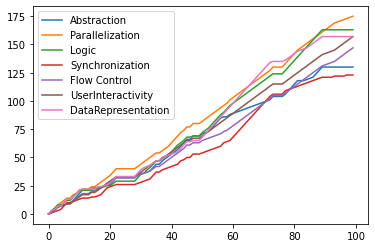

In [65]:
df_plot_cumsum.plot()

<AxesSubplot:>

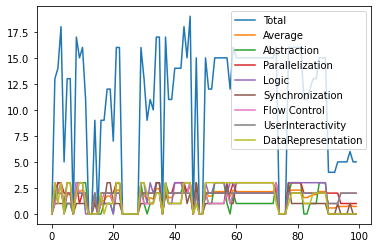

In [138]:

#df_analyzer.plot()

In [95]:
df_plot = df_analyzer.loc[:, "Abstraction":"DataRepresentation"]

<AxesSubplot:>

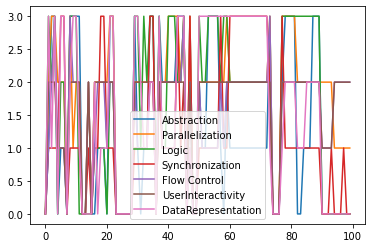

In [97]:
df_plot.plot()

In [ ]:
# Percentil: Valor que no se supera en un 25,50,75% de las veces

In [ ]:
plt.plot()

Text(0, 0.5, 'Abstraction')

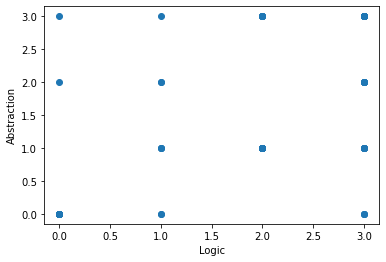

In [141]:
plt.scatter(df_analyzer['Logic'], df_analyzer['Abstraction'])
plt.xlabel("Logic")
plt.ylabel('Abstraction')

In [50]:
pd.notnull(df_analyzer).count()

Project               100
Total                 100
Average               100
Level                 100
Abstraction           100
Parallelization       100
Logic                 100
Synchronization       100
Flow Control          100
UserInteractivity     100
DataRepresentation    100
dtype: int64

In [144]:
df_analyzer["Logic"].mean()

1.63

In [149]:
df_analyzer["Logic"].quantile(0.4)

1.6000000000000014

In [150]:
df_analyzer["Logic"].median()

2.0

In [154]:
df_analyzer[df_analyzer["Total"]==7]

,Project,Total,Average,Level,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
20,121595381_2021_02_01_12_18_25_550087.sb3,7,1.00,Basic,0,2,0,1,1,2,1


In [24]:
df_analyzer.sum(numeric_only=True)/len(df_analyzer)

Total                 10.520000
Average                1.502857
Abstraction            1.300000
Parallelization        1.750000
Logic                  1.630000
Synchronization        1.230000
Flow Control           1.470000
UserInteractivity      1.570000
DataRepresentation     1.570000
dtype: float64

array([[<AxesSubplot:title={'center':'Abstraction'}>]], dtype=object)

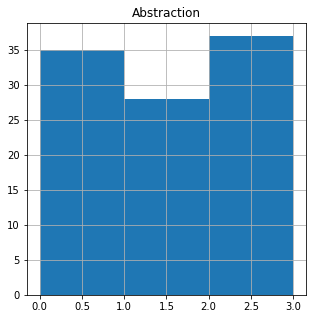

In [86]:
df_analyzer.hist(bins=3,column="Abstraction",figsize=(5,5))
#MAL porque suma los del 2 y los del 3

In [90]:
groupby_count1 = df_analyzer.groupby(['Abstraction']).count()
groupby_count1

,Project,Total,Average,Level,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
Abstraction,,,,,,,,,,
0,35,35,35,35,35,35,35,35,35,35
1,28,28,28,28,28,28,28,28,28,28
2,9,9,9,9,9,9,9,9,9,9
3,28,28,28,28,28,28,28,28,28,28


(array([35., 28., 37.]),
 array([0., 1., 2., 3.]),
 <BarContainer object of 3 artists>)

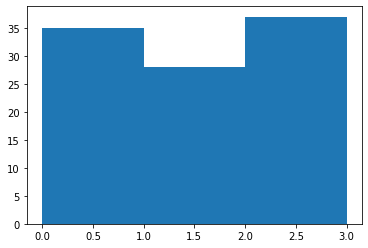

In [93]:
plt.hist(df_analyzer.Abstraction, bins=3)

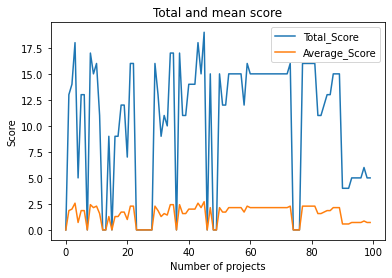

In [104]:
plt.plot(df_analyzer.index, df_analyzer.Total,label="Total_Score")
plt.plot(df_analyzer.index, df_analyzer.Average, label="Average_Score")
plt.xlabel("Number of projects")
plt.ylabel("Score")
plt.title("Total and mean score")
plt.legend()
plt.show()

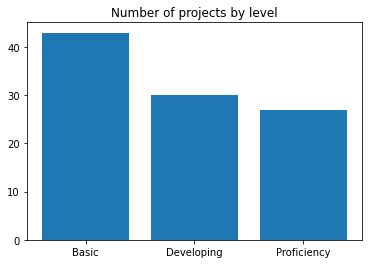

In [113]:
values = df_analyzer["Level"].value_counts()
names = df_analyzer.Level.unique()
plt.bar(names, values)
plt.title("Number of projects by level")
plt.show()

<AxesSubplot:>

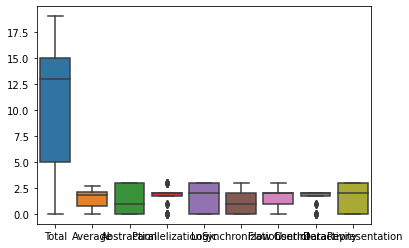

In [88]:
sns.boxplot(data=df_analyzer)

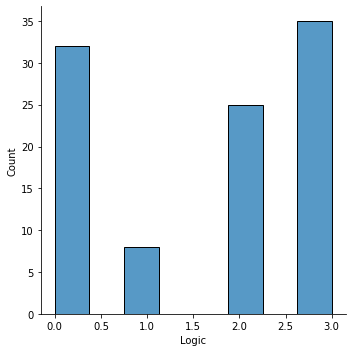

In [83]:
sns.displot(df_analyzer["Logic"])

<AxesSubplot:xlabel='Logic', ylabel='Density'>

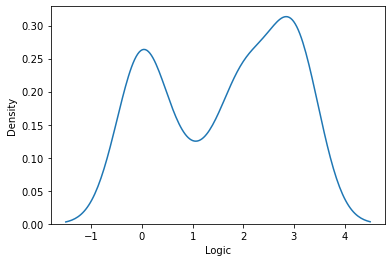

In [81]:
# No tiene sentido
sns.kdeplot(df_analyzer["Logic"])

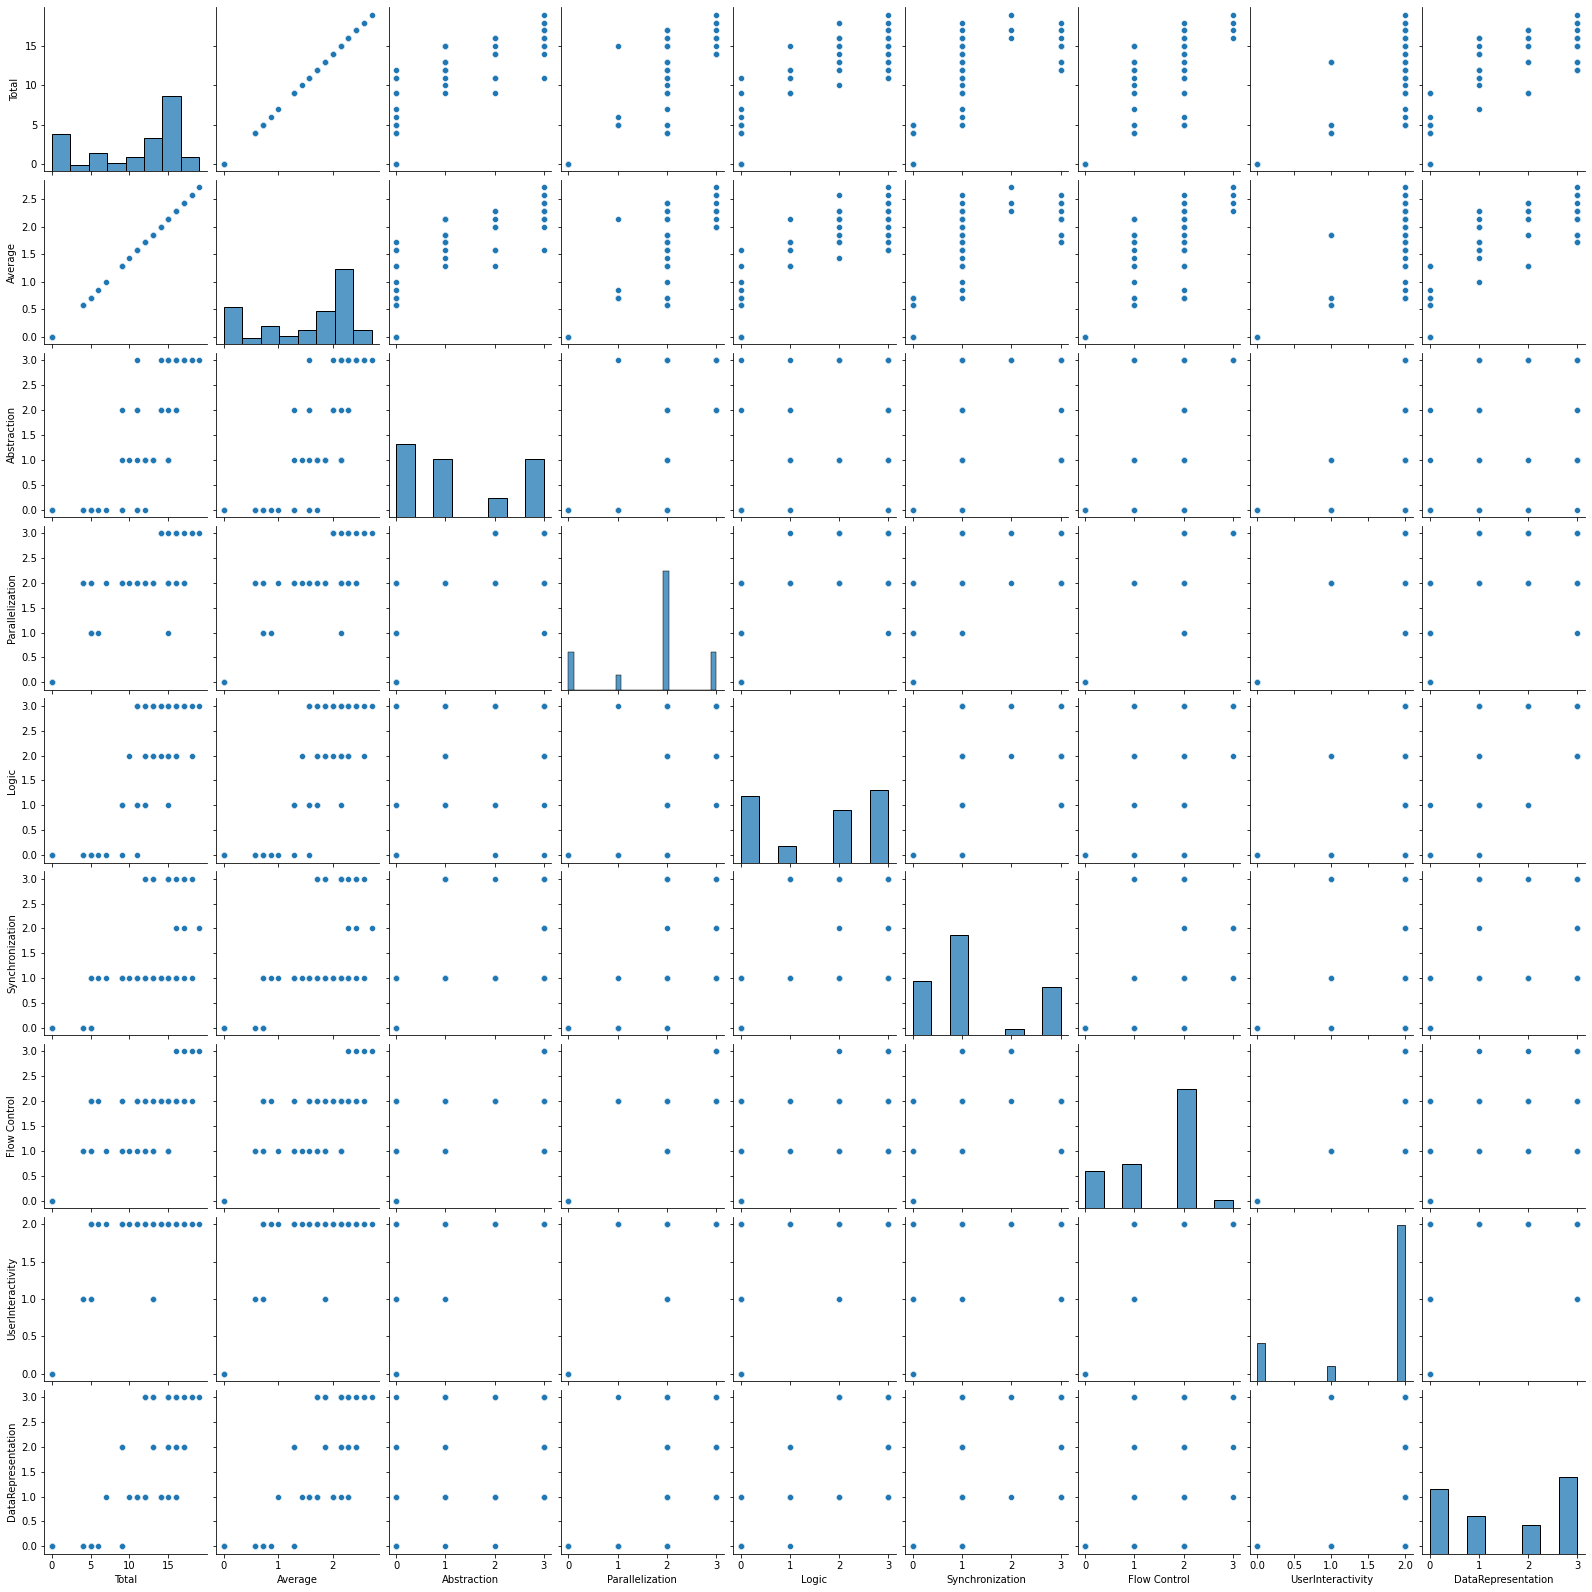

In [79]:
sns.pairplot(df_analyzer)

IndexError: index 9 is out of bounds for axis 1 with size 9

<Figure size 1728x1440 with 0 Axes>

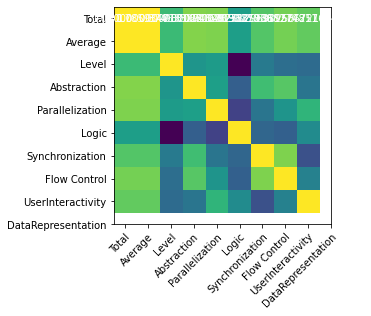

In [70]:
##Mal
corr_matrix=df_analyzer.corr().values
fig, ax = plt.subplots()
im = ax.imshow(corr_matrix)
ct = df_analyzer.columns[1:]
# We want to show all ticks...
ax.set_xticks(np.arange(len(ct)))
ax.set_yticks(np.arange(len(ct)))
# ... and label them with the respective list entries
ax.set_xticklabels(ct)
ax.set_yticklabels(ct)
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
# Loop over data dimensions and create text annotations.
for i in range(len(ct)):
    for j in range(len(ct)):
        text = ax.text(j, i, corr_matrix[i, j],
                       ha="center", va="center", color="w")
fig.tight_layout()
plt.show()

<AxesSubplot:>

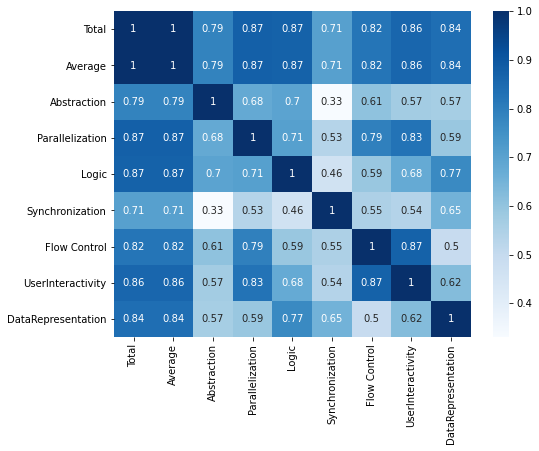

In [73]:
plt.figure(figsize=(8,6))
#sns.set_context('paper', font_scale=1.4)
corr_matrix= df_analyzer.corr()
sns.heatmap(corr_matrix, annot= True, cmap='Blues')

In [42]:
# Normalizar
df_analyzer["Logic"]/max(df_analyzer["Logic"])

0     0.000000
1     1.000000
2     0.666667
3     1.000000
4     0.000000
        ...   
95    0.000000
96    0.000000
97    0.000000
98    0.000000
99    0.000000
Name: Logic, Length: 100, dtype: float64

In [21]:
"Log" in df_analyzer

False